In [126]:
import re #for regular expressions
import nltk #for text manipulation
import string 
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from gensim.models.deprecated.doc2vec import LabeledSentence
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline 

train =pd.read_csv('train.csv')

test=pd.read_csv('test.csv')


ModuleNotFoundError: No module named 'xgboost'

In [2]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [3]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [4]:
train.shape,test.shape


((31962, 3), (17197, 2))

In [5]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

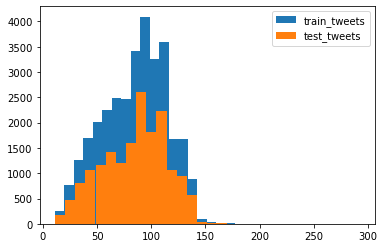

In [6]:
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train, bins=30, label="train_tweets")
plt.hist(length_test, bins=30, label="test_tweets")
plt.legend()
plt.show()

In [7]:
combi=train.append(test,ignore_index=True)
combi.shape


(49159, 3)

In [8]:
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [9]:
combi['tidy_tweet']=np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()
#removing twitter handles(@user)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
combi['tidy_tweet']=combi['tidy_tweet'].str.replace("[^a-zA-Z#]","")
combi.head(10)
#Removing punctuation, Numbers and special characters 

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,whenafatherisdysfunctionalandissoselfishhedragshiskidsintohisdysfunction#run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanksfor#lyftcrediticantusecausetheydontofferwheelchairvansinpdx#disapointed#getthanked
2,3,0.0,bihday your majesty,bihdayyourmajesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#modeliloveutakewithuallthetimeinur
4,5,0.0,factsguide: society now #motivation,factsguidesocietynow#motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,hugefanfareandbigtalkingbeforetheyleavechaosandpaydisputeswhentheygetthere#allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,campingtomorrowdanny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,thenextschoolyearistheyearforexamscantthinkaboutthat#school#exams#hate#imagine#actorslife#revolutionschool#girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,wewonlovetheland#allin#cavs#champions#cleveland#clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcomehereimitsso#gr


In [11]:
combi['tidy_tweet']=combi['tidy_tweet'].apply(lambda x: ''.join([w for w in x.split() if len(w)>3]))
combi.head()
#removing short words

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,whenafatherisdysfunctionalandissoselfishhedragshiskidsintohisdysfunction#run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanksfor#lyftcrediticantusecausetheydontofferwheelchairvansinpdx#disapointed#getthanked
2,3,0.0,bihday your majesty,bihdayyourmajesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#modeliloveutakewithuallthetimeinur
4,5,0.0,factsguide: society now #motivation,factsguidesocietynow#motivation


In [12]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
#tokenizing
tokenized_tweet.head()
#text normalization

0                [whenafatherisdysfunctionalandissoselfishhedragshiskidsintohisdysfunction#run]
1    [thanksfor#lyftcrediticantusecausetheydontofferwheelchairvansinpdx#disapointed#getthanked]
2                                                                           [bihdayyourmajesty]
3                                                         [#modeliloveutakewithuallthetimeinur]
4                                                             [factsguidesocietynow#motivation]
Name: tidy_tweet, dtype: object

In [13]:
#we can normalize the tokenized tweets
from nltk.stem.porter import *
stemmer= PorterStemmer()
tokenized_tweer =tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])
#stemming

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] =''.join(tokenized_tweet[i])
combi['tidy_tweet']=tokenized_tweet
#stiching these token back together as it can be easily done using nltk's MosesDetokenizer function 


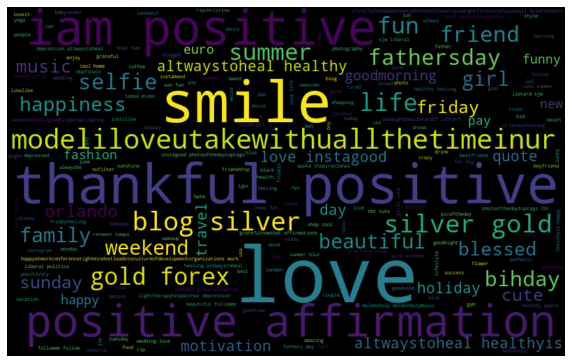

In [15]:
#understanding common words used in tweets:WordCloud
all_words =' '.join([text for text in combi['tidy_tweet']])  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

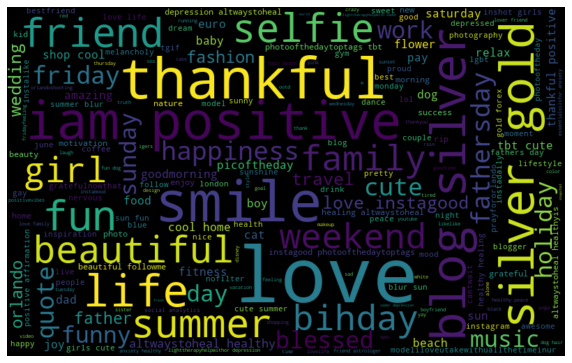

In [16]:
#words is non racist/sexist tweets
normal_words =''.join([text for text in combi['tidy_tweet'][combi['label']==0]])
wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

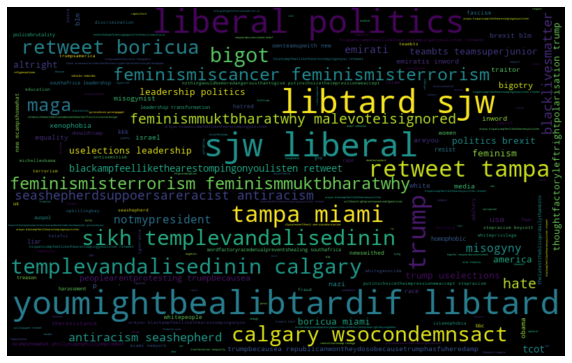

In [17]:
#racist/sexist tweets
negative_words =' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [18]:
#function to collect hashtags
def hashtag_extract(x):
    hashtags=[]
#loop over the words in the tweer 
    for i in x:
        ht =re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [19]:
#extracting hashtags from non racist/sexist tweets
HT_regular=hashtag_extract(combi['tidy_tweet'][combi['label']==0])

#extracting hashtags from racist/sexist tweets 
HT_negative=hashtag_extract(combi['tidy_tweet'][combi['label']==1])

#unnesting list
HT_regular=sum(HT_regular,[])
HT_negative=sum(HT_negative,[])

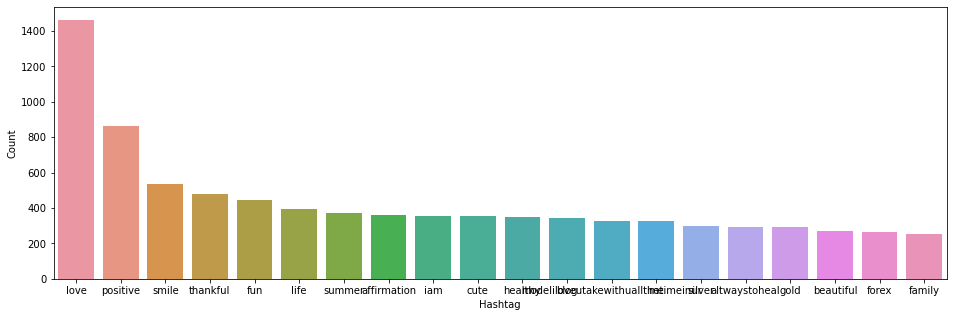

In [20]:
#understanding the impact of Hashtags on tweets sentiments(Non-Racist/Sexist Tweets)
a=nltk.FreqDist(HT_regular) 
d=pd.DataFrame({'Hashtag':list(a.keys()), 'Count':list(a.values())})
#selecting top 20 frequenct hashtags 
d=d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d, x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

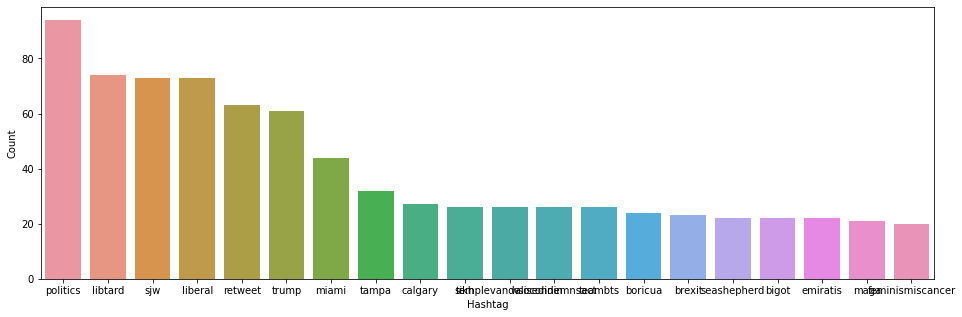

In [21]:
b=nltk.FreqDist(HT_negative)
e=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
#selecting top 20 frequenct hashtags 
e=e.nlargest(columns="Count", n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e, x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

In [22]:
#build a classification model
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [23]:
#tf-idf feature(another method which is based on the frequency method bit it is differennt to the bag-of words approach in the sense that it takes into account not just the occurence of a word in a single document)
tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [24]:
#word2vec model embedding
#training a word2vector in our corpus

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
#tokenizing

model_w2v=Word2Vec(tokenized_tweet, size=200, window=5 ,min_count=2,sg=1,hs=0,negative=10,workers=2,seed=34)


In [25]:
model_w2v.train(tokenized_tweet, total_examples=len(combi['tidy_tweet']),epochs=20)

(176034, 983080)

In [26]:
model_w2v.wv.most_similar(positive="dinner")

KeyError: "word 'dinner' not in vocabulary"

In [27]:
model_w2v.wv.most_similar(positive="dinner")

KeyError: "word 'dinner' not in vocabulary"

In [ ]:
model_w2v['food']

In [ ]:
len(model_w2v['food'])

In [ ]:
def word_vector(token,size):
    vec=np.zeros(size).reshape((1,size))
    count=0
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1,size))
            count+=1
        except :
            continue
    if count!=0:
        vec/=count
    return vec
wordvec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:]=word_vector(tokenized_tweet[i],200)
    wordvec_df=pd.DataFrame(wordvec_arrays)
    wordvec_df.shape
    

In [ ]:
#Doc2Vec embedding
tqdm.pandas(desc="progress-bar")

def add_label(twt):
    output=[]
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s,["tweet"+str(i)]))
    return output
#label all tweets
labeled_tweets=add_label(tokenized_tweet)
labeled_tweets[:6]


In [ ]:
#training a doc2vec model
model_d2v=Doc2Vec(dm=1,dm_mean=1,size=200,window=5,negative=7,workers=3,alpha=0.1,seed=23)


In [ ]:
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets,total_examples=len(combi['tidy_tweet']),epochs=15)

In [ ]:
#preparing doc2vec FeatureSet
docvec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(combi)):
    docvec_arrays[i,:]=model_d2v.docvec[i].reshape((1,200))
docvec_df=pd.DataFrame(docvec_arrays)
docvec_df.shape

In [32]:
#extracting train and test bow features 
train_bow=bow[:31962,:]
test_bow=bow[:31962,:]

In [34]:
#splitting data into training and validation 
set xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train[label'],random_state=42,test_size=0.3)

IndentationError: unexpected indent (<ipython-input-34-522504e64775>, line 2)

In [35]:
lreg=LogisticRegression()
#training the model 
lreg.fit(xtrain_bow,ytrain)
prediction=lreg.prediction_proba(xvalid_bow)
#predicting on the validation 
set prediction_int =prediction[:,1] >=0.3
#if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int =prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)
#claculating f1 score for the validation set 


SyntaxError: invalid syntax (<ipython-input-35-caf7022f208d>, line 6)

In [37]:
test_pred=lreg.predict_proba(test_bow)
test_pred_init=test_pred[:,1] >= 0.3 
test_pred_init=test_pred_init.astype(np.int)
test['label']=test_pred_int submission =test[['id','label']]
submission. to_csv('sub_lreg_bow.csv',index=Flase)
#writing data to a csv file

SyntaxError: invalid syntax (<ipython-input-37-96ebe623c751>, line 4)

In [41]:
#TF-IDF Features
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[:31962,:]
xtrain_tfidf= train_tfidf[ytrain.index]
xvalid_tfidf=train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf,ytrain)
prediction=lreg.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
#calculation f1 score for the validation set 
f1_score(yvalid, prediction_int)

NameError: name 'ytrain' is not defined

In [43]:
#word2Vec Features￼
#word2Vec Features
train_w2v = wordvec_df.iloc[:31962, :]
test_w2v = wordvec_df.iloc [31962:,:]
xtrain_w2v = train_w2v.iloc[ytrain.index, :] 
xvalid_w2v = train_w2v.iloc [yvalid.index,:]

lreg.fit (xtrain_w2v, ytrain)
prediction = lreg .predict_proba (xvalid_w2v) 
prediction_int = prediction [:,1] >= 0.3 
prediction_int = prediction_int.astype (np.int) 
f1_score(yvalid, prediction_int)

NameError: name 'wordvec_df' is not defined

In [63]:
#Doc2Vec Features
train_d2v = docvec_df.iloc [:31962,:] 
test_d2v = docvec_df.iloc [31962:,:]
xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xvalid_d2v = train_d2v.iloc [yvalid .index,:]

lreg.fit (xtrain_d2v, ytrain)
prediction = lreg .predict_proba(xvalid_d2v) 
prediction_int = prediction [:, ] >= 0.3 
prediction_int = prediction_int.astype (np.int) 
f1_score(yvalid, prediction_int)

NameError: name 'docvec_df' is not defined

In [50]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit (xtrain_bow, ytrain)

prediction = svc.predict_proba (xvalid_bow) 
prediction_int = prediction [:,1] >= 0.3
prediction_int = prediction_int.astype( np.int )
f1_score(yvalid, prediction_int)

NameError: name 'xtrain_bow' is not defined

In [56]:
#make predictions for the test dataset and create another submissionfile.

test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred [:,l] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test ['label'] = test_pred_int
submission = test [['id ', 'label']]
submission.to_csv ('sub_svm_bow.csv', index=False)

NameError: name 'svc' is not defined

In [57]:
#TF-IDF Features
svc = svm.SVC(kernel= 'linear',C=1, probability=True).fit(xtrain_tfidf.ytrain) 
prediction = svc.predict_proba (xvalid_tfidf) 
prediction_int = prediction [:,1] >= 0.3 
prediction_int = prediction_int .astype(np .int) 
f1_score(yvalid, prediction_int)

NameError: name 'xtrain_tfidf' is not defined

In [58]:
#Word2Vec Features

svc = svm.SVC(kernel= 'linear', C=1, probability=True).fit (xtrain_w2v,ytrain)

prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction [:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 
f1_score (yvalid, prediction_int)

NameError: name 'xtrain_w2v' is not defined

In [62]:
#Doc2Vec Features

svc = svm.SVC(kernel= 'linear', C=1, probability=True).fit (xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction [:,l] >= 0.3 
prediction_int = prediction_int .astype(np.int) 
f1_score(yvalid, prediction_int)

NameError: name 'xtrain_d2v' is not defined

In [64]:
#we willtrainour RandomForest model onthe Bag-of-Words features and check its performance on bothvalidation set and public leaderboard.

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit (xtrain_bow , ytrain) 
prediction = rf.predict (xvalid_bow )
#validation score
f1_score(yvalid, prediction)

NameError: name 'RandomForestClassifier' is not defined

In [67]:
#Let's make predictions for the test dataset and create another submission file.

test_pred = rf.predict (test_bow ) 
test[ 'label']= test_pred_submission= test [['id', 'label']] 
submission.to_csv ('sub_rf_bow.csv' , index=False)

NameError: name 'rf' is not defined

In [70]:
#TF-IDF Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)
prediction = rf.predict (xvalid_tfidf) 
f1_score(yvalid, prediction)

NameError: name 'xtrain_tfidf' is not defined

In [71]:
#Word2Vec Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)
prediction - rf.predict (xvalid_w2v) 
f1_score (yvalid, prediction) 



NameError: name 'xtrain_w2v' is not defined

In [72]:
#Doc2Vec Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v,ytrain)
prediction = rf.predict (xvalid_d2v) 
f1_score (yvalid, prediction) 

NameError: name 'xtrain_d2v' is not defined

In [75]:
#Bag-of-Words Features

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow ) 
f1_score (yvalid, prediction)

NameError: name 'XGBClassifier' is not defined

In [ ]:

test_pred = xgb_model.predict(test_bow)
test('label') = test_pred_submission = test[['id','label']]
submission.to_csv ('sub_xgb_bow .csv' , index=False)

In [77]:
#TF-IDF Features
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf,ytrain)
prediction = xgb.predict (xvalid_tfidf) 
f1_score (yvalid, prediction)
 










	

NameError: name 'XGBClassifier' is not defined

In [78]:

#Word2Vec Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict (xvalid_w2v) 
f1_score(yvalid, prediction) 



NameError: name 'XGBClassifier' is not defined

In [79]:
#Doc2Vec Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread=3).fit(xtrain_d2v, ytrain)
prediction = xgb .predict (xvalid_d2v) 
f1_score (yvalid , prediction)

NameError: name 'XGBClassifier' is not defined

In [84]:
#Here we willuse DMatrices. A DMatrix can contain both the features and the target.

dtrain = xgb.DMatrix (xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix (xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)
#	Parameters that we are going to tune params = {
#'objective ':'binary:logistic ', 'max_depth ':6, 'min_child_weight ': l,
#'eta ':.3, 'subsample ': l,
#'colsample_byt ree': 1
#}

NameError: name 'xgb' is not defined

In [86]:
#We will prepare a custom evaluation metric to calculate Fl score.

def custom_eval (preds, dtrain):
    labels = dtrain.get_label().astype(np.int) 
    preds = (preds >= 0.3).astype (np.int)
    return [('f1_score ', f1_score (labels, preds))]


In [87]:
#Tuning max_ depth and min_ chiId_ weight
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range (6,10)
    for min_child_weight in range (5,8)
]

max_f1 = 0. # initializing with 0 
best_params = None
for max_depth, min_child_weight in gridsearch_params:    
    print ("CV with max_depth={}, min_child_weight={}".format(max_depth , min_child_weight ))
    
    
    

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7


In [112]:
# Update our parameters
params['max_depth '] = max_depth
params['m in_child_weight '] = min_child_weight

# Cross-validation
cv_ results = xgb.cv (params,dtrain,feval= custom_eval, num_boost_round= 200, maximize=True,seed=16, nfold=5,early_stopping_rounds=10)

SyntaxError: invalid syntax (<ipython-input-112-e914f9e74c5d>, line 6)

In [103]:
#Finding best F1 Score

mean_f1 = cv_results['test -f1_score-mean '].max()

boost_rounds = cv_results['test-f1_score-mean '].argmax()
print("\tF1 Score {} for {}rounds".format (mean_f1,boost_rounds))
if mean_f1 > max_f1:
    max_f1 = mean_f1
    best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, F1 Score : {}".format (best_params[0], best_params [1], max_f1))

NameError: name 'cv_results' is not defined

In [106]:
#Updating max_ depth and min_ child_ weight parameters.

params['max_depth'] = 8
params['min_child_weight'] = 6


#Tuning subsample and cosample
gridsearch_params = [(subsample, colsample) for subsample in [i/10. for i in range (S,10)]
for colsample in[i/10. for i in range (S,10)] ]

max_f1 = 0. 
best_params = None
for subsample, colsample in gridsearch_params:
    print ('CV with subsample={}, colsample={}'.format (subsample, colsample))
    

NameError: name 'params' is not defined

In [108]:
# Update our parameters
params['colsample'] = colsample 
params['subsample'] = subsample 
cv results = xgb .cv (params,dtrain,feval= custom_eval, num_boost_round=200, maximize=True, seed=16,nfold=5,early_stopping_rounds=10)

SyntaxError: invalid syntax (<ipython-input-108-2ff081c971f9>, line 4)

In [111]:
#Finding best F1 Score
mean_f1 = cv_results['test-fl_score-mean '].max()
boost_rounds =cv_results['test-fl_score-mean'].argmax()
print("\tFl Score {}for {} rounds".format (mean_fl, boost_rounds))
if mean_fl > max_fl: 
    max_fl = mean_fl
    best_params =(subsample, colsample)
print("Best params: {}, {}, F1 Score : {}".format (best_params[0], best_params [1], max_f1))

NameError: name 'cv_results' is not defined

In [117]:
#Updating subsample and colsample_bytree
params['subsample'] = .9
params ['colsample_bytree'] = .5


#Nowlet'stune the learning rate.
max_f1 = 0. 
best_params = None
for eta in ( .3,.2,.1,.05,.01,.005):
    print ("CV with eta={}".format (eta))
    # Update ETA
    params['eta'] = eta

# Run CV
cv_results=xgb.cv( params,dtrain,feval= custom_eval, num_boost_round=1000, maximize=True, seed=l6,nfold=5,early_stopping_rounds=20)





NameError: name 'params' is not defined

In [123]:
#Finding best Fl Score
mean_f1 = cv_results['test-fl_score-mean '].max ()
boost_rounds=cv_results['test-fl_score-mean'].argmax ()
print ("\tFl Score {}for {} rounds".format(mean_fl, boost_rounds))
if mean_f1 > max_f1: 
    max_f1 = mean_f1 
    best_params = eta
print("Best params: {}, Fl Score: {}".format(best_params, max_fl))



NameError: name 'cv_results' is not defined

In [124]:
#Finally we can now use these tuned parameters in our xgboost model. We have used early stoppingof 10 which means if the model's performance doesn't improve under 10 rounds,then the modeltraining will be stopped.
xgb_model = xgb.train( params,dtrain,feval= custom_eval, num_boost_round= 1000, maximize=True,evals= [(dvalid , "Validation")],early_stopping_rounds=10)

NameError: name 'xgb' is not defined

In [125]:
#Let's prepare one finalsubmission file.
test_pred = xgb_model.predict(dtest) 
test['label '] = (test_pred >= 0.3).astype(np .int) 
submission = test [['id','label ']]
submission.to_csv('sub_xgb_w2v_finetuned.csv', index=False)

NameError: name 'xgb_model' is not defined